In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from pulsars import Pulsars, c, e_charge, e_mass, h
import speiser_fun as sf 
import speiser_fun_cyl as sfc
import speiser_integ as si
import speiser_plots as sp
import speiser_model as sm
import speiser_spec as ss

In [2]:
#Ανάγνωση του λεξικού παραμέτρων

    

with open('{}/par_dic.txt'.format('data_spec_1'), 'rb') as par_dic:
    pdic = pickle.loads(par_dic.read())

#Έκχώρηση των παραμέτρων της προσωμοίωσης
k = pdic['multiplicity']
name = pdic['pulsar_name']
pulsar = Pulsars(k)[name]

gamma1 = 1.
B_0 = pdic['char magn field (Blc)']
omegaB = (e_charge*B_0/(e_mass*c))    #γυροσυχνότητα
Rlc = pdic['Radius of lc']
Delta = pdic['diss zone length']
# q = pdic['charge sign']

# gamma0 = np.array([1000., 1.])   #αρχικός παράγοντας Lorentz
# init_pos = np.array([0.5])

gamma0 = pdic['initial lorentz factors']
init_pos = pdic['initial injection positions']

delta_init = pdic['diss zone width']    #πάχος του φύλλου ρεύματος, αδιάστατο, σε μονάδες [c/ωΒ]

T = pdic['runtime']
N = pdic['number of t points']
t = np.linspace(0.0, T*Delta, N)

dt = t[100]-t[99]

A = k*B_0*c*(Delta*c/omegaB)/(e_charge*len(gamma0)*len(init_pos)*N)

In [3]:
title_fs = 25
label_fs = 25
tick_fs = 20
text_fs = 20
ins_fs = 17

el_col = 'xkcd:scarlet'
pos_col = 'xkcd:royal blue'

In [4]:
total = np.zeros(201)
total_el = np.zeros(201)
total_pos = np.zeros(201)



for a in [1,2,3]:
    dir_path = 'data_spec_{}'.format(a)
    
    for q in [-1,1]:
        if q == +1:
            charge = 'pos'
            init_pos = np.array([0.001])
        else:
            charge = 'el'
            init_pos = np.array([1.])
        for w in [0]:
    #     for w in range(len(init_pos)):
    #         if  w != 7:
            spec = np.load('{}/spectrum_{}_{}2.npz'.format(dir_path, int(100*init_pos[w]), charge))
            (en, ph_num, ph_num_out, ph_num_out2, ph_num_sep, ph_en, 
             ph_en_out, ph_en_out2, ph_en_sep, ph_num_tot, ph_en_tot) = (spec['en'], 
                                                                         spec['ph_num'], 
                                                                         spec['ph_num_out'], 
                                                                         spec['ph_num_out2'],
                                                                         spec['ph_num_sep'],
                                                                         spec['ph_en'], 
                                                                         spec['ph_en_out'],
                                                                         spec['ph_en_out2'],
                                                                         spec['ph_en_sep'],
                                                                         spec['ph_num_tot'],
                                                                         spec['ph_en_tot'])

            if charge == 'el':
                total_el += ph_en_tot
            else:
                total_pos += ph_en_tot

            total = (total_el + total_pos)*1.3
            
# for s in range(len(en)):
# #     if en[s]*A*total[s] > 5*10**35:
# #         total[s] = np.NaN
#     if en[s]*A*total_el[s] > 5*10**35:
#         total_el[s] = np.NaN
#     if en[s]*A*total_pos[s] > 5*10**35:
#         total_pos[s] = np.NaN
# total = (total_el + total_pos)*1.3        

# for s in range(len(en)):
# #     if en[s]*A*total[s] > 5*10**35:
# #         total[s] = np.NaN
#     if en[s] > 3.4*10**10 and en[s] < 4.2*10**10:
#         total_el[s] = np.NaN
    
#         total_pos[s] = np.NaN
# total = (total_el + total_pos)*1.3        

<IPython.core.display.Javascript object>


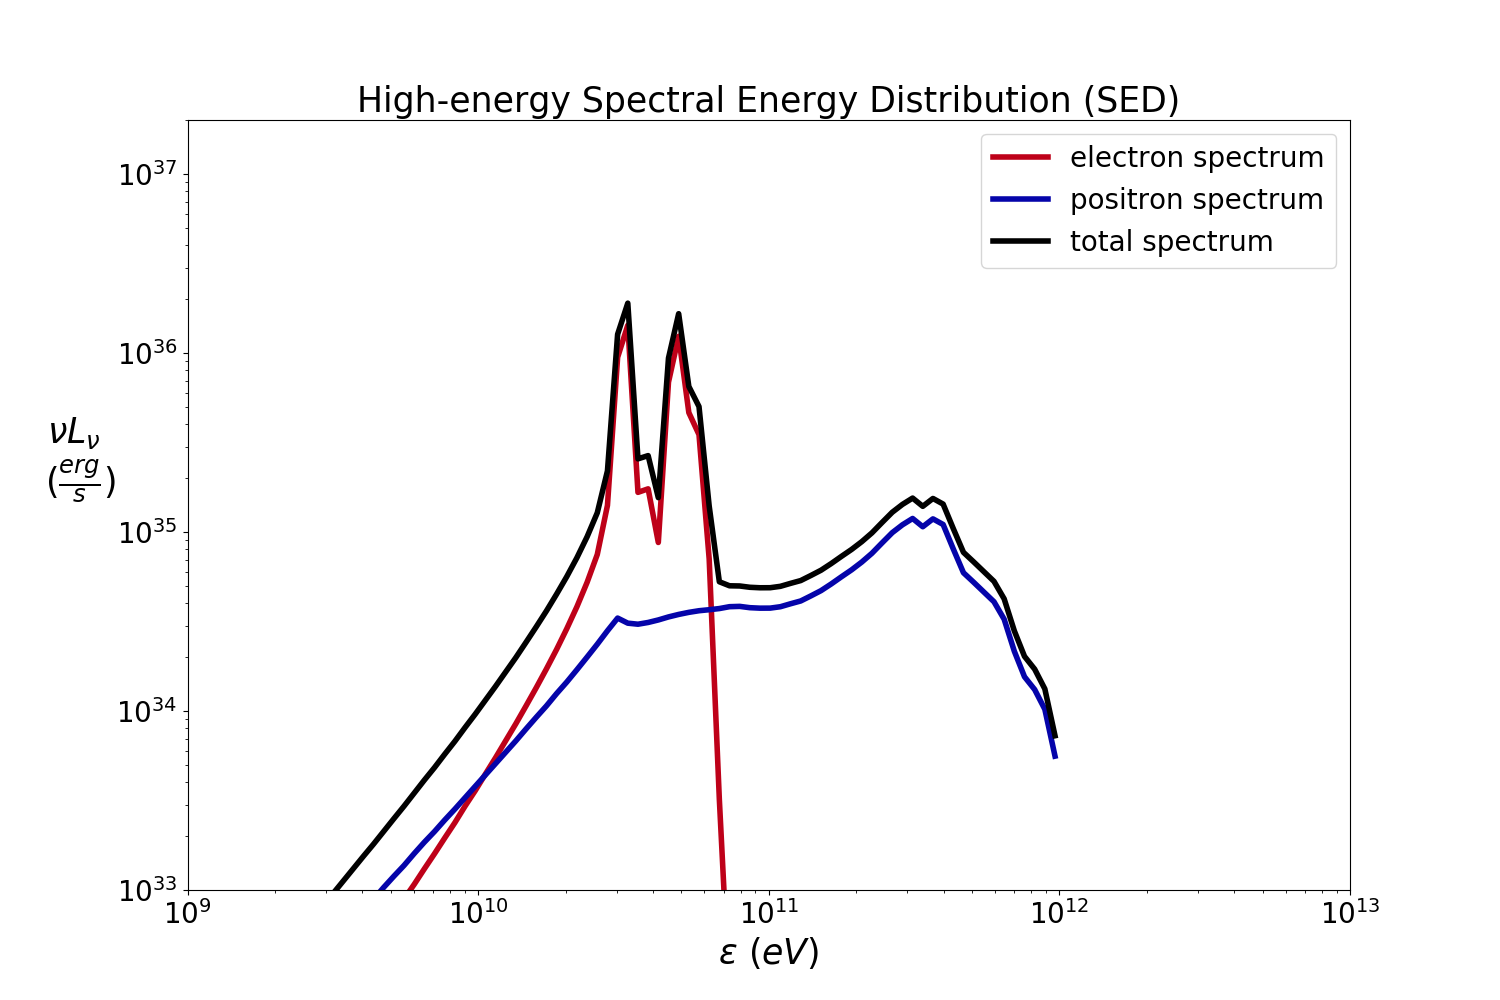

In [5]:
%matplotlib notebook
fig, ax = plt.subplots(figsize  = (15, 10))

ax.plot(en, en*A*total_el, color = el_col, label = 'electron spectrum', linewidth = 4)
ax.plot(en, en*A*total_pos, color = pos_col, label = 'positron spectrum', linewidth = 4)
ax.plot(en, en*A*total, color = 'k', label = 'total spectrum', linewidth = 4)

ax.set_xlabel('$\epsilon \ (eV)$', fontsize = label_fs)
ax.set_ylabel('$\\nu L_{\\nu}$ \n $(\\frac{erg}{s})$', fontsize = label_fs, rotation = 0, labelpad = 30)
ax.set_title('High-energy Spectral Energy Distribution (SED)', fontsize = title_fs)
ax.set_xscale(value = 'log', nonposx = 'mask')
ax.set_yscale(value = 'log', nonposy = 'mask')

ax.xaxis.set_tick_params(labelsize = tick_fs)
ax.yaxis.set_tick_params(labelsize = tick_fs)

ax.set_xlim(10**9, 10**13)
ax.set_ylim(1.*10**33, 2.*10**37)

ax.legend(loc = 'best', fontsize = text_fs)

In [6]:
fig.savefig('spectrum1.png')